In [1]:
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
%cd 'drive/MyDrive/Github/master_thesis'

[Errno 2] No such file or directory: 'drive/MyDrive/Github/master_thesis'
/home/anuar/PycharmProjects/master-thesis/clustering


In [4]:
%cd ..

/home/anuar/PycharmProjects/master-thesis


# Import Data

In [5]:
df = pd.read_csv('data/220201_preprocessed_data.csv')
df.head()

,gender,postnr,region,Timings_yyyymmdd,Q1_1_feel_exposed,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,...,Q14_ocupation_employee_public,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum,season,timestamp
0,Man,2830,Capital,20210103,2.0,3.0,5.0,7.0,4.0,7.0,...,1,0,0,0,2.0,4.0,4.0,2.0,4.0,2021-01-03
1,Woman,4654,Zealand,20200731,3.0,7.0,7.0,7.0,5.0,7.0,...,1,0,0,0,2.0,4.0,2.0,4.0,2.0,2020-07-31
2,Woman,7451,Central,20210605,3.0,7.0,7.0,7.0,7.0,7.0,...,1,0,0,0,2.0,3.0,3.0,4.0,2.0,2021-06-05
3,Woman,6740,Southern,20200826,2.0,2.0,3.0,3.0,7.0,7.0,...,1,0,0,0,2.0,4.0,3.0,3.0,2.0,2020-08-26
4,Man,4700,Zealand,20201106,6.0,6.0,1.0,7.0,2.0,1.0,...,0,0,0,0,3.0,4.0,2.0,4.0,3.0,2020-11-06


In [6]:
df.columns.tolist()

['gender',
 'postnr',
 'region',
 'Timings_yyyymmdd',
 'Q1_1_feel_exposed',
 'Q1_2_covid_is_threat',
 'Q2_1_easy_to_follow_advice',
 'Q2_2_can_follow_advice_if_wanted',
 'Q2_3_if_follow_advice_safe',
 'Q2_4_if_follow_advice_others_safe',
 'Q2_5_follow_advice_relationships_impared',
 'Q2_6_follow_advice_life_degraded',
 'Q3_1_aware_hand_hygiene',
 'Q3_2_avoid_contact',
 'Q3_3_ensure_frequent_cleaning',
 'Q3_4_avoid_risk_groups',
 'Q3_5_keep_distance',
 'Q3_6_avoid_crowds',
 'Q3_7_minimize_activities_w_contact',
 'Q3b_1_sneeze_sleeve',
 'Q5_1_others_took_distance',
 'Q5_2_others_follow_advice',
 'Q5_3_others_not_care_spreading',
 'Q5_4_yourself_kept_distance',
 'Q5_5_feel_urge_scold',
 'Q6_1_sanctions_are_too_harsh',
 'Q6_2_advices_important',
 'Q6_3_others_can_avoid_spreading',
 'Q6_4_advices_create_fair_burden_dristribution',
 'Q6_5_ownership_of_advice',
 'Q6_6_clear_information_on_advice_reason',
 'Q6_7_advice_limits_daily_activities',
 'Q6_8_advices_enough_for_prevention',
 'Q6_9_tru

## Extract non behavioural columns

In [7]:
non_behaviour_cols = ['gender','postnr', 'region', 'Timings_yyyymmdd', 'season','Q10_education', 'Q11_nr_members_household',
 'Q12_nr_children_household','age_num', 'Q14_ocupation_pensioner',
 'Q14_ocupation_employee_private',
 'Q14_ocupation_unemployed',
 'Q14_ocupation_employee_public',
 'Q14_ocupation_self_employed',
 'Q14_ocupation_student',
 'Q14_ocupation_other',
 'Q15_economic_spectrum',
 'Q15_social_spectrum',
 'Q16_economic_spectrum',
 'Q16_social_spectrum',
 'timestamp',
 'Q7_1_last_week_fever',
 'Q7_2_last_week_cough',
 'Q7_3_last_week_sore_throat',
 'Q7_4_last_week_no_smell_taste',
 'Q7_5_last_week_shortness_breath',
 'Q2020NovNy1',
 'Q2020NovNy2_tested_positive',
 'Q2020NovNy3',
 'Q2020NovNy4']

In [8]:
behaviour_cols = df.columns.tolist()
for element in non_behaviour_cols:
    if element in behaviour_cols:
        behaviour_cols.remove(element)

## Scale Answers

In [9]:
answers = df[behaviour_cols].to_numpy()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(answers)
answers = scaler.transform(answers)

# K-means clustering

## Elbow approach to determine ideal amount of clusters

In [10]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(answers)
    distortions.append(kmeanModel.inertia_)


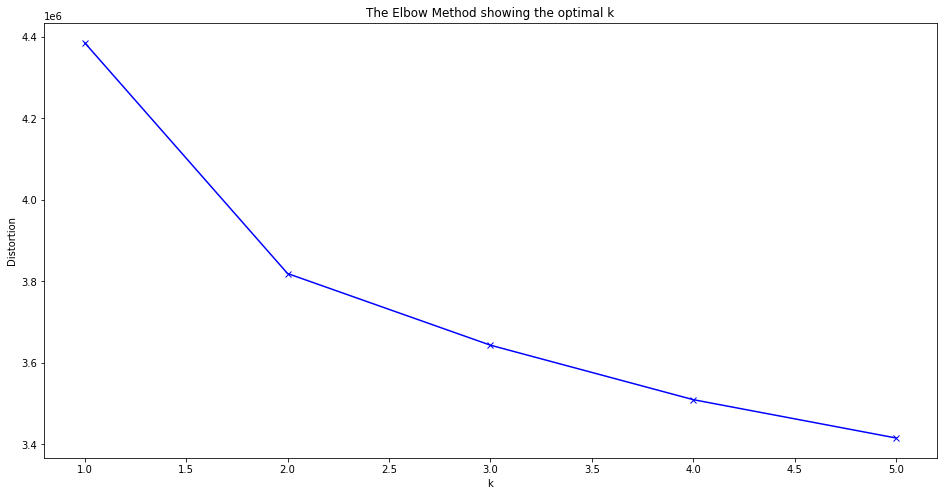

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-means fit

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(answers)

In [12]:
df['group']=kmeans.labels_

In [13]:
df.head()

,gender,postnr,region,Timings_yyyymmdd,Q1_1_feel_exposed,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,...,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum,season,timestamp,group
0,Man,2830,Capital,20210103,2.0,3.0,5.0,7.0,4.0,7.0,...,0,0,0,2.0,4.0,4.0,2.0,4.0,2021-01-03,0
1,Woman,4654,Zealand,20200731,3.0,7.0,7.0,7.0,5.0,7.0,...,0,0,0,2.0,4.0,2.0,4.0,2.0,2020-07-31,0
2,Woman,7451,Central,20210605,3.0,7.0,7.0,7.0,7.0,7.0,...,0,0,0,2.0,3.0,3.0,4.0,2.0,2021-06-05,0
3,Woman,6740,Southern,20200826,2.0,2.0,3.0,3.0,7.0,7.0,...,0,0,0,2.0,4.0,3.0,3.0,2.0,2020-08-26,0
4,Man,4700,Zealand,20201106,6.0,6.0,1.0,7.0,2.0,1.0,...,0,0,0,3.0,4.0,2.0,4.0,3.0,2020-11-06,1


# Analysis

## Groups Description

In [14]:
groups_def = pd.DataFrame(data=scaler.inverse_transform(kmeans.cluster_centers_), columns=behaviour_cols)
groups_def

,Q1_1_feel_exposed,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,...,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_8_advices_enough_for_prevention,Q6_9_trust_political_strategy,Ny1_nr_times_wearing_masks_last_week,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers
0,3.285959,5.186380,5.921816,6.379385,5.926552,6.468584,4.242336,3.241055,6.68577,6.215346,...,6.221164,5.917527,4.284443,5.471332,5.693441,2.025709,1.419739,1.253574,1.412044,2.140593
1,2.801507,4.101531,4.635869,5.272563,4.527606,5.248089,4.369146,3.875599,5.61670,4.276553,...,4.525489,4.117558,4.105700,4.383724,3.832044,1.741234,1.850032,2.345251,2.596438,4.018211


In [15]:
groups_dist = np.abs(groups_def.iloc[0] - groups_def.iloc[1])
np.linalg.norm(groups_dist.values, ord=1)

39.56320968533722

## Groups daily distribution

In [16]:
groups_percentage = df.groupby(['timestamp','group'],as_index=False)['gender'].count()
groups_percentage

,timestamp,group,gender
0,2020-05-29,0,37
1,2020-05-29,1,17
2,2020-05-30,0,225
3,2020-05-30,1,88
4,2020-05-31,0,136
...,...,...,...
1099,2021-11-29,1,47
1100,2021-11-30,0,88
1101,2021-11-30,1,51
1102,2021-12-01,0,86


In [17]:
def normalize(row):
  sum = groups_percentage[groups_percentage['timestamp']==row['timestamp']]['gender'].sum()
  return row['gender']/sum

groups_percentage['percentage'] = groups_percentage.apply(lambda x: normalize(x), axis=1)
groups_percentage.drop(columns='gender',inplace=True)
groups_percentage

,timestamp,group,percentage
0,2020-05-29,0,0.685185
1,2020-05-29,1,0.314815
2,2020-05-30,0,0.718850
3,2020-05-30,1,0.281150
4,2020-05-31,0,0.632558
...,...,...,...
1099,2021-11-29,1,0.394958
1100,2021-11-30,0,0.633094
1101,2021-11-30,1,0.366906
1102,2021-12-01,0,0.581081


In [ ]:
# for pandas version "1.4.0, we pray for the day colab updates"
'''groups_per_day = df[['timestamp','group']].groupby(['timestamp']).value_counts(normalize=True)
groups_percentage = groups_per_day.index.to_frame(index=False)
groups_percentage['percentage'] = groups_per_day.values
groups_percentage'''

In [22]:
observations = pd.read_csv('data/observations_30012022.csv',sep=';', decimal=',', encoding='utf-8')

In [32]:
sliced_observations.columns[2:]

Index(['Number_of_deaths', 'Cumulative_number_of_deaths', 'Confirmed_cases',
       'Admissions_hospital'],
      dtype='object')

In [33]:
sliced_observations = observations.iloc[92:643]
fig = px.line(sliced_observations, x="Date", y=sliced_observations.columns[2:])
fig.show()

In [29]:
fig = px.line(groups_percentage, x="timestamp", y="percentage", color='group', title='Group daily distribution')
fig.show()

## Group non-behavioural Analysis

In [21]:
group_analysis = df[non_behaviour_cols+['group','timestamp']].copy()
group_analysis.head()

,gender,postnr,region,Timings_yyyymmdd,season,Q10_education,Q11_nr_members_household,Q12_nr_children_household,age_num,Q14_ocupation_pensioner,Q14_ocupation_employee_private,Q14_ocupation_unemployed,Q14_ocupation_employee_public,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum,timestamp,Q7_1_last_week_fever,Q7_2_last_week_cough,Q7_3_last_week_sore_throat,Q7_4_last_week_no_smell_taste,Q7_5_last_week_shortness_breath,Q2020NovNy1,Q2020NovNy2_tested_positive,Q2020NovNy3,Q2020NovNy4,group,timestamp
0,Man,2830,Capital,20210103,4.0,8,1,0,6,0,0,0,1,0,0,0,2.0,4.0,4.0,2.0,2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,2021-01-03
1,Woman,4654,Zealand,20200731,2.0,3,1,0,5,0,0,0,1,0,0,0,2.0,4.0,2.0,4.0,2020-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,2020-07-31
2,Woman,7451,Central,20210605,2.0,4,1,0,5,0,0,0,1,0,0,0,2.0,3.0,3.0,4.0,2021-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,2021-06-05
3,Woman,6740,Southern,20200826,2.0,1,1,0,5,0,0,0,1,0,0,0,2.0,4.0,3.0,3.0,2020-08-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,2020-08-26
4,Man,4700,Zealand,20201106,3.0,3,1,0,5,1,0,0,0,0,0,0,3.0,4.0,2.0,4.0,2020-11-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,2020-11-06


In [22]:
groups_def

,Q1_1_feel_exposed,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,Q3_3_ensure_frequent_cleaning,Q3_4_avoid_risk_groups,Q3_5_keep_distance,Q3_6_avoid_crowds,Q3_7_minimize_activities_w_contact,Q3b_1_sneeze_sleeve,Q5_1_others_took_distance,Q5_2_others_follow_advice,Q5_3_others_not_care_spreading,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_1_sanctions_are_too_harsh,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_4_advices_create_fair_burden_dristribution,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_8_advices_enough_for_prevention,Q6_9_trust_political_strategy,Ny1_nr_times_wearing_masks_last_week,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers
0,3.285959,5.186380,5.921816,6.379385,5.926552,6.468584,4.242336,3.241055,6.68577,6.215346,5.710970,6.537259,6.298429,6.195505,5.917265,6.689923,4.681892,5.096186,3.562371,6.355939,2.934732,3.112086,6.471568,4.754333,4.864741,6.221164,5.917527,4.284443,5.471332,5.693441,2.025709,1.419739,1.253574,1.412044,2.140593
1,2.801507,4.101531,4.635869,5.272563,4.527606,5.248089,4.369146,3.875599,5.61670,4.276553,4.163565,5.107839,4.424715,4.199050,3.883111,6.041192,3.588124,4.141676,3.525979,4.914718,2.219223,3.514946,4.808662,4.105098,3.630386,4.525489,4.117558,4.105700,4.383724,3.832044,1.741234,1.850032,2.345251,2.596438,4.018211


In [23]:
group_analysis.groupby(['group']).mean()

,postnr,Timings_yyyymmdd,season,Q10_education,Q11_nr_members_household,Q12_nr_children_household,age_num,Q14_ocupation_pensioner,Q14_ocupation_employee_private,Q14_ocupation_unemployed,Q14_ocupation_employee_public,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum,Q7_1_last_week_fever,Q7_2_last_week_cough,Q7_3_last_week_sore_throat,Q7_4_last_week_no_smell_taste,Q7_5_last_week_shortness_breath,Q2020NovNy1,Q2020NovNy2_tested_positive,Q2020NovNy3,Q2020NovNy4
group,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5658.473821,2.020540e+07,2.557624,4.084362,1.802166,0.547080,3.886702,0.283438,0.214699,0.032873,0.336343,0.049154,0.049216,0.034276,2.387174,3.405765,2.453926,3.320881,0.017126,0.076985,0.065473,0.016381,0.016492,0.013698,0.003117,0.025844,2.770075
1,5586.889055,2.020589e+07,2.441971,4.212466,1.919002,0.712879,2.945332,0.377722,0.223297,0.031689,0.153085,0.061569,0.115076,0.037562,2.552536,3.309721,2.673575,3.143058,0.023605,0.113535,0.097881,0.021506,0.021037,0.017397,0.002434,0.022287,2.765627


In [24]:
df.columns

Index(['gender', 'postnr', 'region', 'Timings_yyyymmdd', 'Q1_1_feel_exposed',
       'Q1_2_covid_is_threat', 'Q2_1_easy_to_follow_advice',
       'Q2_2_can_follow_advice_if_wanted', 'Q2_3_if_follow_advice_safe',
       'Q2_4_if_follow_advice_others_safe',
       'Q2_5_follow_advice_relationships_impared',
       'Q2_6_follow_advice_life_degraded', 'Q3_1_aware_hand_hygiene',
       'Q3_2_avoid_contact', 'Q3_3_ensure_frequent_cleaning',
       'Q3_4_avoid_risk_groups', 'Q3_5_keep_distance', 'Q3_6_avoid_crowds',
       'Q3_7_minimize_activities_w_contact', 'Q3b_1_sneeze_sleeve',
       'Q5_1_others_took_distance', 'Q5_2_others_follow_advice',
       'Q5_3_others_not_care_spreading', 'Q5_4_yourself_kept_distance',
       'Q5_5_feel_urge_scold', 'Q6_1_sanctions_are_too_harsh',
       'Q6_2_advices_important', 'Q6_3_others_can_avoid_spreading',
       'Q6_4_advices_create_fair_burden_dristribution',
       'Q6_5_ownership_of_advice', 'Q6_6_clear_information_on_advice_reason',
       'Q6_7_ad

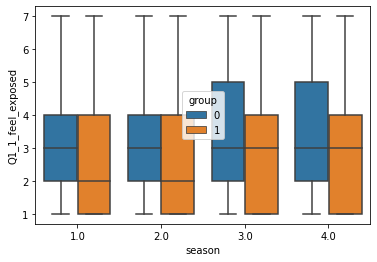

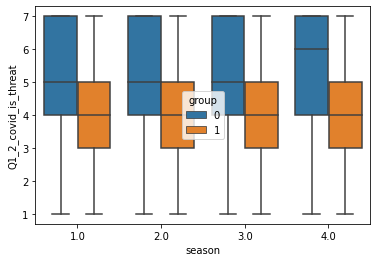

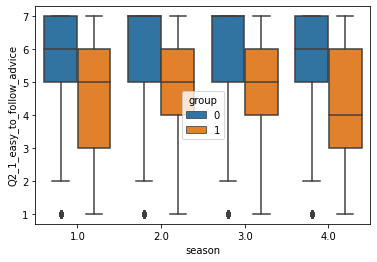

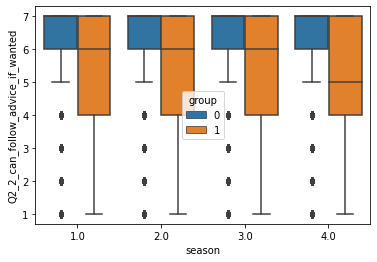

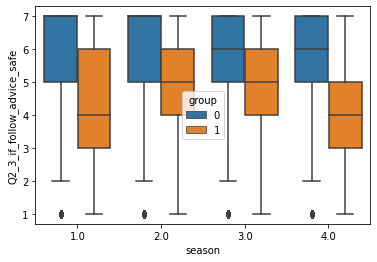

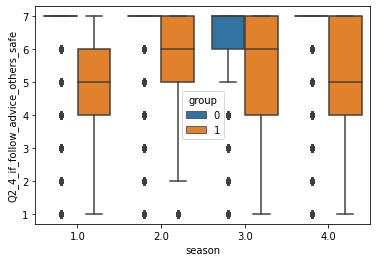

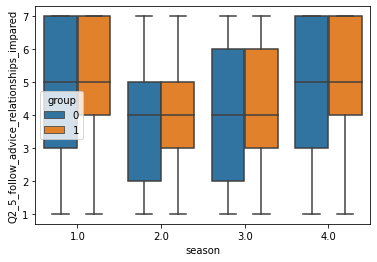

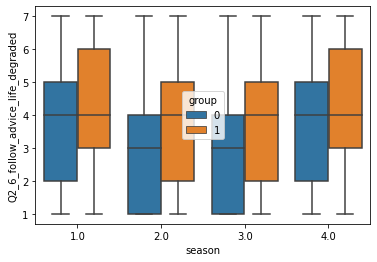

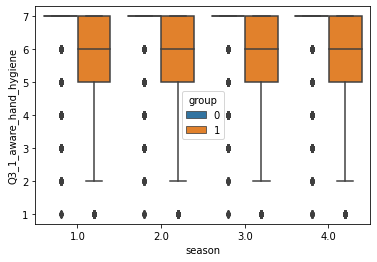

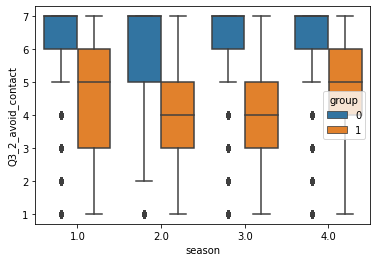

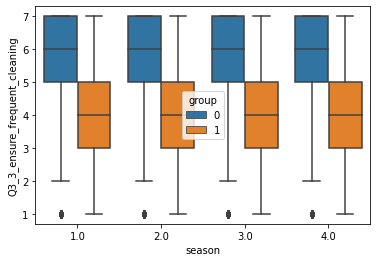

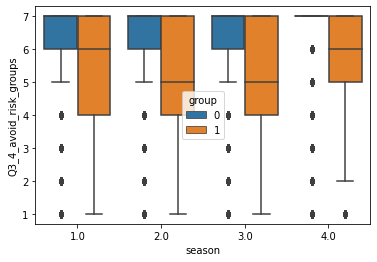

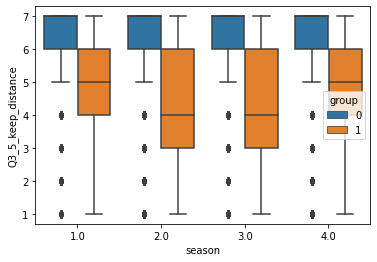

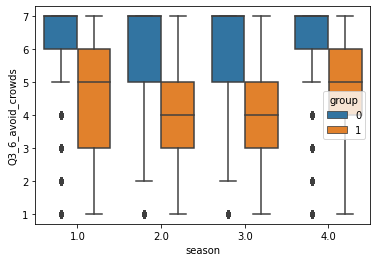

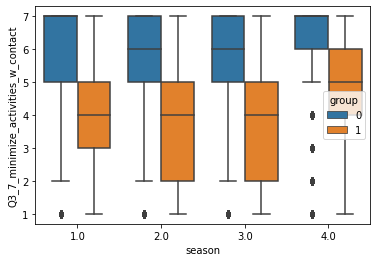

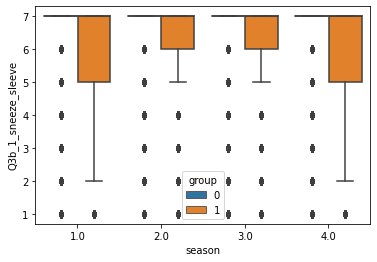

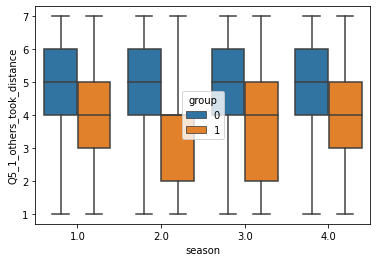

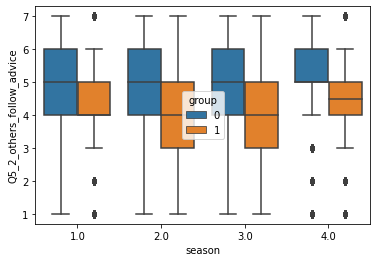

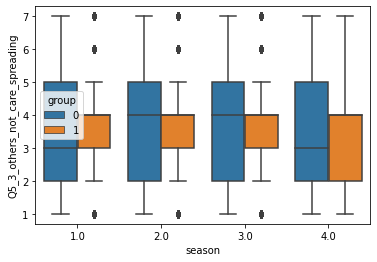

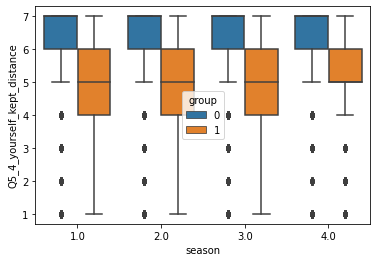

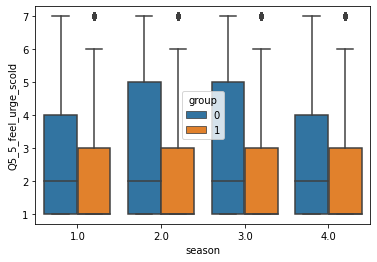

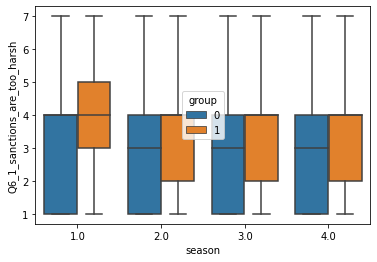

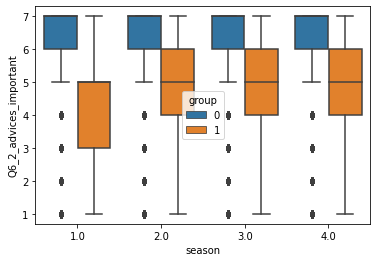

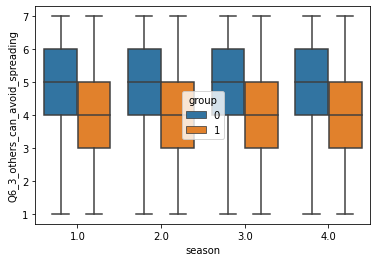

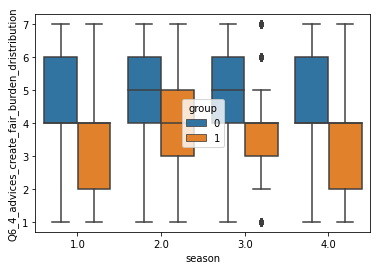

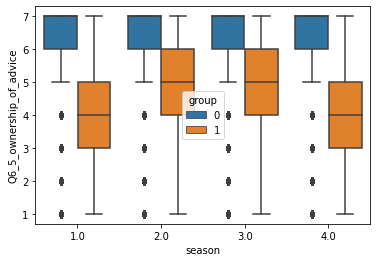

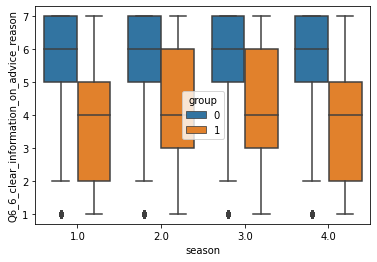

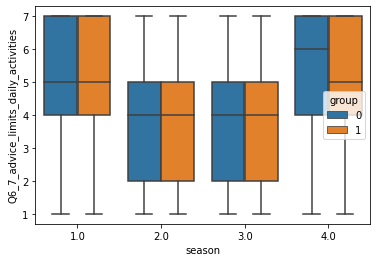

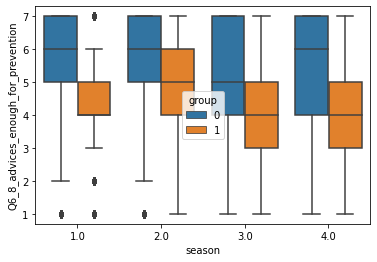

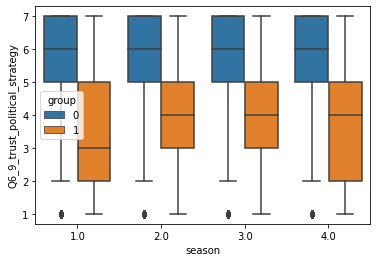

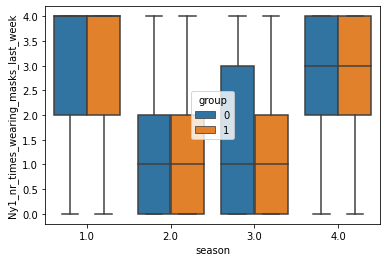

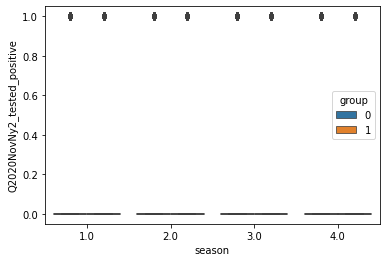

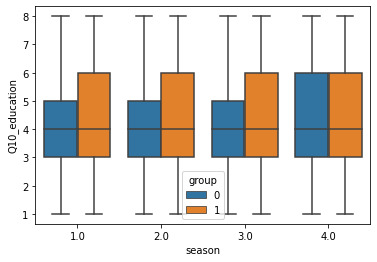

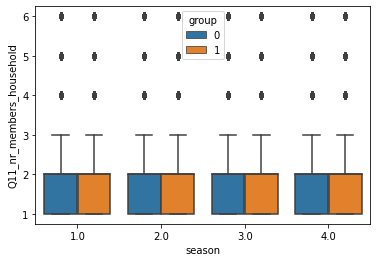

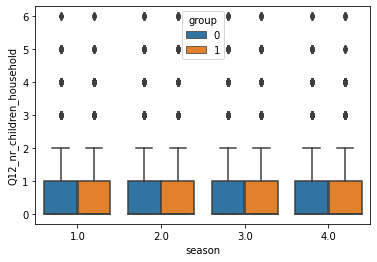

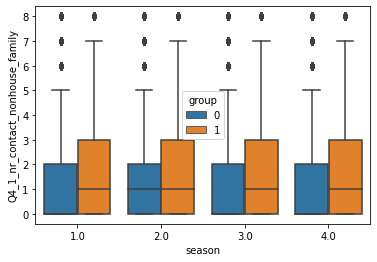

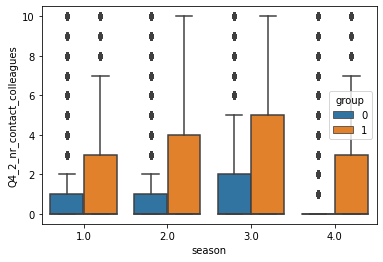

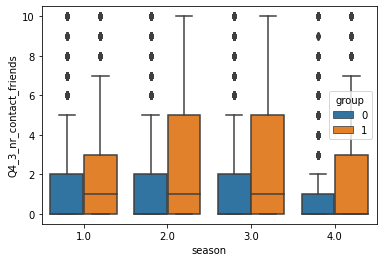

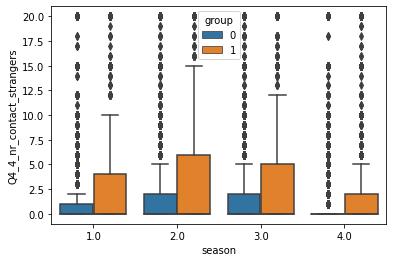

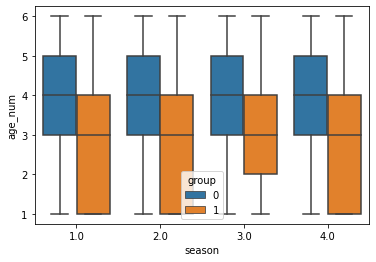

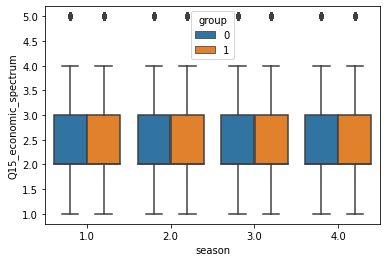

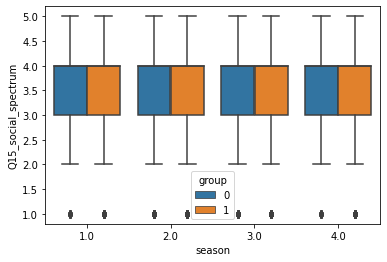

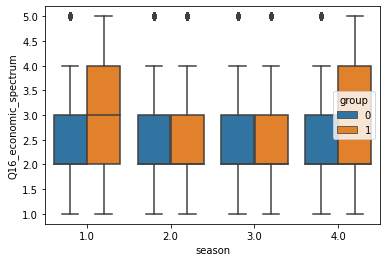

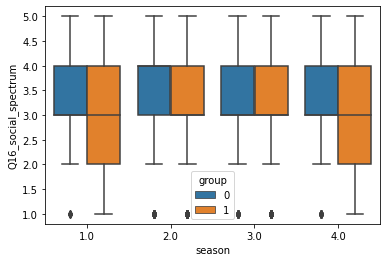

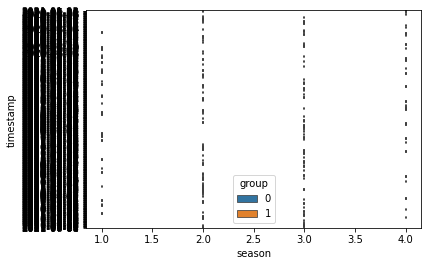

In [38]:
import seaborn as sns
interesting_cols = ['Q1_1_feel_exposed',
       'Q1_2_covid_is_threat', 'Q2_1_easy_to_follow_advice',
       'Q2_2_can_follow_advice_if_wanted', 'Q2_3_if_follow_advice_safe',
       'Q2_4_if_follow_advice_others_safe',
       'Q2_5_follow_advice_relationships_impared',
       'Q2_6_follow_advice_life_degraded', 'Q3_1_aware_hand_hygiene',
       'Q3_2_avoid_contact', 'Q3_3_ensure_frequent_cleaning',
       'Q3_4_avoid_risk_groups', 'Q3_5_keep_distance', 'Q3_6_avoid_crowds',
       'Q3_7_minimize_activities_w_contact', 'Q3b_1_sneeze_sleeve',
       'Q5_1_others_took_distance', 'Q5_2_others_follow_advice',
       'Q5_3_others_not_care_spreading', 'Q5_4_yourself_kept_distance',
       'Q5_5_feel_urge_scold', 'Q6_1_sanctions_are_too_harsh',
       'Q6_2_advices_important', 'Q6_3_others_can_avoid_spreading',
       'Q6_4_advices_create_fair_burden_dristribution',
       'Q6_5_ownership_of_advice', 'Q6_6_clear_information_on_advice_reason',
       'Q6_7_advice_limits_daily_activities',
       'Q6_8_advices_enough_for_prevention', 'Q6_9_trust_political_strategy',
       'Ny1_nr_times_wearing_masks_last_week',
       'Q2020NovNy2_tested_positive','Q10_education', 'Q11_nr_members_household',
       'Q12_nr_children_household', 'Q4_1_nr_contact_nonhouse_family',
       'Q4_2_nr_contact_colleagues', 'Q4_3_nr_contact_friends',
       'Q4_4_nr_contact_strangers', 'age_num', 'Q15_economic_spectrum',
       'Q15_social_spectrum', 'Q16_economic_spectrum', 'Q16_social_spectrum',
       'timestamp']
for i in interesting_cols:
  sns.boxplot(x="season", y=i, hue="group",data=df)
  plt.show()
